<a href="https://colab.research.google.com/github/vsanglik/ai/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mnist data - 784 - encode them to lesser number of nodes [32] - decode them back to 784 [ reconstruct input]

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model # functional composition
from tensorflow.keras.layers import Input, Dense
import numpy as np #arrays
import matplotlib.pyplot as plt # visualization


In [ ]:
# 784 - 32 - 784 [xa[0.01, 0.87,0.987]- xp[[7566,987309,9187301]]]
# read dataset
(x_train,_),(x_test,_) = mnist.load_data()
## scale the data to a range of 0 to 1 by dividing the values between 0- 255
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
## reshape the data
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation = 'relu')(input_img) #784 -32
decoded = Dense(784,activation = 'sigmoid')(encoded) # 32- 784
autoencoder = Model(input_img,decoded)

In [ ]:
autoencoder.compile(optimizer = 'adam',
                    loss= 'binary_crossentropy')
autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size = 100,
                shuffle= True,
                validation_data=(x_test,x_test))

Epoch 1/50
600/600 [==============================] - 5s 6ms/step - loss: 0.2145 - val_loss: 0.1495
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.1337 - val_loss: 0.1191
Epoch 3/50
600/600 [==============================] - 6s 9ms/step - loss: 0.1127 - val_loss: 0.1047
Epoch 4/50
600/600 [==============================] - 4s 7ms/step - loss: 0.1025 - val_loss: 0.0979
Epoch 5/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0976 - val_loss: 0.0949
Epoch 6/50
600/600 [==============================] - 5s 8ms/step - loss: 0.0956 - val_loss: 0.0936
Epoch 7/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0947 - val_loss: 0.0930
Epoch 8/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0942 - val_loss: 0.0927
Epoch 9/50
600/600 [==============================] - 5s 8ms/step - loss: 0.0939 - val_loss: 0.0926
Epoch 10/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0937 - val_loss: 0.092

313/313 [==============================] - 1s 2ms/step


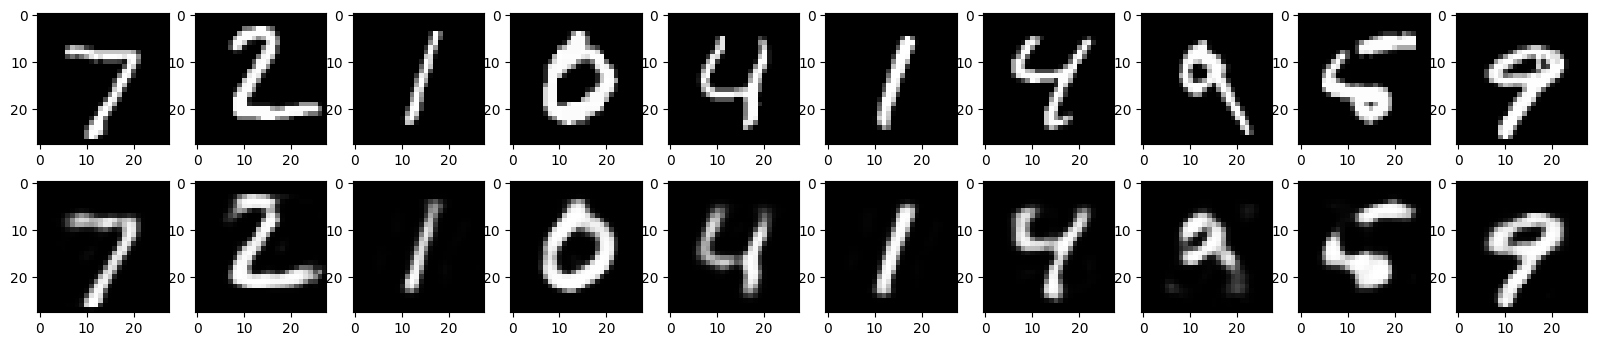

In [ ]:
# visualize the reconstructed input

reconstructed_image = autoencoder.predict(x_test)

n= 10
plt.figure(figsize=(20,4))
for i in range(n):
  # display the original image
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  # display the reconstructed image
  ax = plt.subplot(2,n,i+n+1)
  plt.imshow(reconstructed_image[i].reshape(28,28))
  plt.gray()
plt.show()

In [ ]:
# please write 3 inferences:

# 9 looks bad
# some edges have been not reconciled correctly
# 5 also does not match
# Image quality for reconstruction is not good
# 4 from reconstructed is blurry ( general behaviour)

In [ ]:
# GAN - autoencoders - data geenration

# boltzmann - autoencodrs with 2 layers are called restricted bltzmann machines